**Analysis of lakes all over the world.**<br>
The data we are using here is month wise.

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm
import scipy

In [7]:
LAKES_PATH="lakes/data/"# path for lakes data
COVID_PATH="covidoxford/data/"# path for covid oxforddata
CITIES_PATH="cities/data/"#path for cities data

In [8]:
lakes_df=pd.read_csv(LAKES_PATH+"lakes_data_1month.csv")
lakes_df=lakes_df[lakes_df["mean"]>=0]
lakes_meta_df=pd.read_csv(LAKES_PATH+"lakes_metadata.csv")
lakes_df=lakes_df.merge(lakes_meta_df,left_on="lake_id",right_on="id",how="inner")

**All over India we have 11 lakes in this dataset.**

In [9]:
lakes_df[lakes_df["country"]=="India"]["lake_id"].unique()

array([1872, 1873, 2066, 2069, 1712, 1713, 1750, 1751, 1871, 2094, 2184])

Here analysis for jayakwadi lake (in Maharashtra) is shown. Fow different lakes the analysis can be done by changing the lake_id.<br>
Here the data is month wise so there will be 12 points. For 2019 and 2020 the points are taken and plotted.<br>
The 2020 year is trying to follow the same curve as 2019. It is not clear that covid-19 has played a very good role for the increase in water level. 

We can see the water level for 2020 is more than 2019 from initially only. There is not much change seen in this data. Again, there may be some change for other parameters of water such as water quality etc. May be due to lockdown there have some changes in quality due to change in industrial and household pollution or the study of same parameter along with some other environment parameter may help.

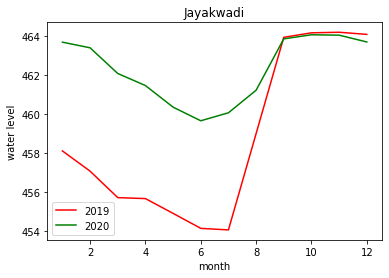

In [10]:
lake_id=2094
lake_data=lakes_df[lakes_df["lake_id"]==lake_id].set_index("week")["mean"].to_dict()
x_2019=[]
y_2019=[]
x_2020=[]
y_2020=[]
for week in lake_data:
    if "2019" in week:
        week_no=int(week.split(".")[0])
        x_2019.append(week_no)
        y_2019.append(lake_data[week])
    elif "2020" in week:
        week_no=int(week.split(".")[0])
        x_2020.append(week_no)
        y_2020.append(lake_data[week])
plt.plot(x_2019,y_2019,label="2019",color="red")
plt.plot(x_2020,y_2020,label="2020",color="green")
plt.title(lakes_meta_df[lakes_meta_df["id"]==lake_id]["name"].values[0])
plt.xlabel('month')
plt.ylabel('water level')
plt.legend()
plt.show()
        

**all the lakes over the world**<br>
There are total 2205 lakes for all over the world present in this dataset. <br>
The water level in 2020 has been more than 2019 from initially only. The changes for 2020 in lockdown period can have some positive results due to lockdown but it is not clearly evident, but again may be analysis in some other way can help.

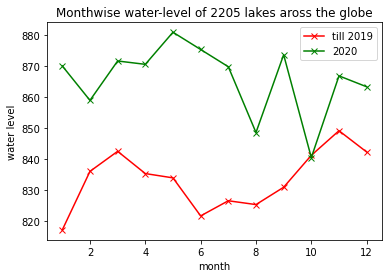

In [11]:
lakes_df["month"]=lakes_df.apply(lambda row : int(row["week"].split(".")[0]),axis = 1)
lakes_pre_df=lakes_df[(~lakes_df["week"].str.contains("2020"))&(~lakes_df["week"].str.contains("2021"))]
lakes_pre_df["avg_pre"]=lakes_pre_df.groupby("month")["mean"].transform("mean")
lakes_post_df=lakes_df[(lakes_df["week"].str.contains("2020"))]
lakes_post_df["avg_post"]=lakes_post_df.groupby("month")["mean"].transform("mean")
pre=lakes_pre_df.set_index("month")["avg_pre"].to_dict()
post=lakes_post_df.set_index("month")["avg_post"].to_dict()
x_pre=[]
y_pre=[]
x_post=[]
y_post=[]
for month in range(1,13):
    if month in pre:
        x_pre.append(month)
        y_pre.append(pre[month])
    if month in post:
        x_post.append(month)
        y_post.append(post[month])
plt.plot(x_pre,y_pre,"x-",label="till 2019",color="red")
plt.plot(x_post,y_post,"x-",label="2020",color="green")
plt.legend()
plt.xlabel("month")
plt.ylabel("water level")
plt.title("Monthwise water-level of 2205 lakes aross the globe")
plt.show()